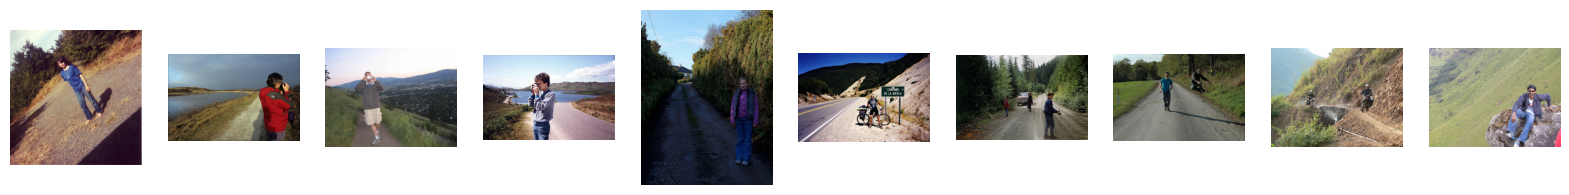

In [15]:
# %% [markdown]
# # Test Image Search API

# %% [markdown]
# Import necessary libraries

# %% [code]
import requests
import json
import base64
from PIL import Image
import matplotlib.pyplot as plt
from io import BytesIO

# %% [markdown]
# Define utility functions

# %% [code]
def encode_image_to_base64(image_path):
    """Encode image at image_path to base64 string."""
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

def decode_base64_to_image(base64_str):
    """Decode a base64 string to an image."""
    image_data = base64.b64decode(base64_str)
    return Image.open(BytesIO(image_data))

# %% [markdown]
# API Endpoint

# %% [code]
API_URL = "http://192.168.31.120:8008/search/"

# %% [markdown]
# Load and encode the test image

# %% [code]
test_image_path = "VOCdevkit/VOC2012/JPEGImages/2007_000027.jpg"
encoded_image = encode_image_to_base64(test_image_path)

# %% [markdown]
# Send POST request to the API
top_k = 10
# %% [code]
response = requests.post(API_URL, json={"image_base64": encoded_image,
                                        "top_k": top_k})
results = response.json()

# %% [markdown]
# Decode and display the response images

# %% [code]
if response.status_code == 200:
    fig, axes = plt.subplots(1, ncols=top_k, figsize=(20, 4))  # Adjust subplot layout for the number of results
    for i, result_base64 in enumerate(results['result_images']):
        img = decode_base64_to_image(result_base64)
        axes[i].imshow(img)
        axes[i].axis('off')
    plt.show()
else:
    print("Failed to retrieve images:", response.status_code, results.get("detail", ""))


In [4]:
results

{'detail': "path should be path-like or io.BytesIO, not <class 'numpy.ndarray'>"}